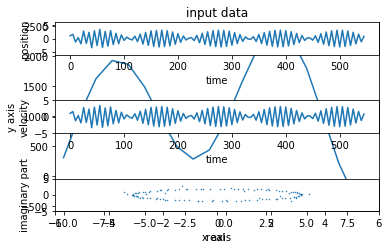

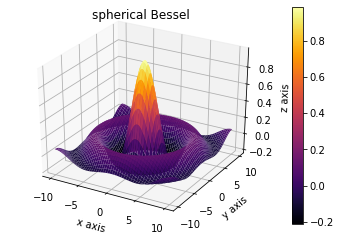

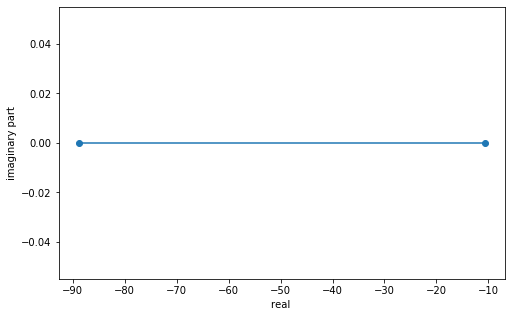

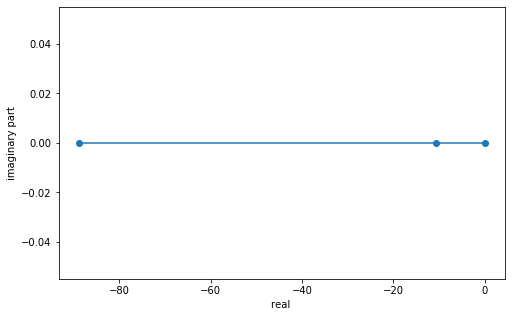

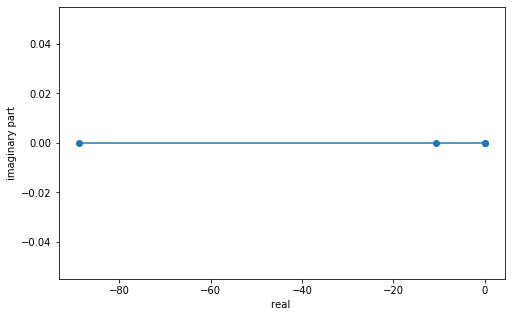

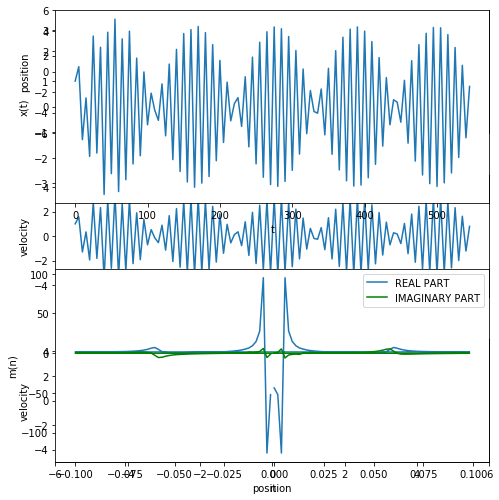

In [16]:
import numpy as np
from scipy import linalg
from scipy.special import spherical_jn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from scipy.fftpack import fft,fftshift, fftfreq



#part A

def fn(n):
    xd,yd = np.loadtxt(n, unpack=True)
    plt.plot(xd,yd)
    plt.title('input data')
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.xlim([1.05*np.min(xd),1.05*np.max(xd)])
    plt.ylim([1.05*np.min(yd),1.05*np.max(yd)])
    plt.savefig('part1figure.pdf')
    np.savetxt('edata19.csv',list(zip(xd,yd)),fmt="%0.2f",delimiter=',')
fn('edata19.dat') 



#PART B



x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
x,y =np.meshgrid(x, y)
r=np.sqrt(x**2 + y**2)
z=spherical_jn(0,r)
fig=plt.figure('spherical bessel')
ax=fig.add_subplot(111,projection ='3d')
ax.set_title('spherical Bessel')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
h=ax.plot_surface(x,y,z, cmap ='inferno')
plt.colorbar(h)
plt.savefig('part2figure.pdf')



#PART C


def calderv(y,t,parm):
    x,v = y
    mu,a,w = parm
    derv=[v,(a*np.sin(w*t)-x + mu*v*(1-(x*x)))]
    return derv

def dif(mu,a,w,xt0=1,vt0=0,xlow= -6,xup= 6,vlow= -5,vup =5):
    
    m=550
    n=5
    t=np.arange(0,m,n)
    y0=[xt0,xt0]
    parm=[mu,a,w]
    soln= odeint(calderv,y0,t,args=(parm,))
    fig=plt.figure(1,figsize=(7,7))
    
    ax1=fig.add_subplot(311)
    ax1.plot(t,soln[:,0])
    ax1.set_ylim(xlow,xup)
    ax1.set_xlabel('time')
    ax1.set_ylabel('position')
    
    
    ax2=fig.add_subplot(312)
    ax2.plot(t,soln[:,0])
    ax2.set_ylim(vlow,vup)
    ax2.set_xlabel('time')
    ax2.set_ylabel('velocity')
    
    
    ax3=fig.add_subplot(313)
    ax3.plot(soln[:,0],soln[:,1],'.',ms=1)
    ax3.set_xlim(xlow,xup)
    ax3.set_ylim(vlow,vup)
    ax3.set_xlabel('position')
    ax3.set_ylabel('velocity')
   
    plt.tight_layout()
    plt.savefig('part3.pdf')
   
    return soln[:,0],t
dif(0.01,2.0,0.6)
    
    
    
    #PART D
    
    
    
def systemmatrix(d,k=-1000):
    I = np.array([[1,0],[0,1]])
    O = np.array([[0,0],[0,0]])
    K = np.array([[k,0.5],[0.5,k]])
    D = np.array([[-1*d,1.0],[1.0,-1*d]])
    A = np.array([[O,I],[K,D]])
    return(A.reshape(4,4))
    

def eigval(A):
     return linalg.eig(A)[0]

def plotfunc(n=500,m=100):
    lin= np.linspace(0,m,n)
    realpart=[]
    imagipart=[]
    for i in lin:
        val= eigval(systemmatrix(i))
        
    for v in val:
        realpart.append(v.real)
        imagipart.append(v.imag)
            
        plt.figure(1,figsize=(8,5))
        plt.xlabel('real ')
        plt.ylabel('imaginary part')
        plt.plot(realpart,imagipart, linestyle='-', marker='o')
        plt.savefig('part4.pdf')
        plt.show()
        
plotfunc()


#PART E







 
    #PART F
    
    
def variable(x,t,m,n):
        
 x,t=dif(0.01,2.0,0.6)
 dt= t[1]-t[0]
 m= fft(x)
 n= fftfreq(x.size,d=dt)
 m= fftshift(m)
 f=plt.figure(1,figsize=(9,5))
 ax1=f.add_subplot(211)
 ax1.plot(t,x)
 ax1.set_xlabel('t')
 ax1.set_ylabel('x(t)')    
 ax2=f.add_subplot(212)
 ax2.set_xlabel('n')
 ax2.set_ylabel('m(n)')
 ax2.plot(n,np.real(m),label='REAL PART')
 ax2.plot(n,np.imag(m),color='g',label='IMAGINARY PART')
 ax2.legend()
 plt.savefig('part6.pdf')

variable(x,t,m,n)

    




    
    




        
    
    
    





    



